In [3]:
import numpy as np 
import matplotlib.pyplot as plt


# Initialising Values 

In [4]:
# Number of steps and positions
n_steps = 40
# n_positions = 2 * n_steps + 1  
n_positions = 1000

coin = np.array([[1/np.sqrt(2), 1/np.sqrt(2)],
                 [1/np.sqrt(2), -1/np.sqrt(2)]])
# Define the vectors
up = np.array([1, 0])
down = np.array([0, 1])

# Reshape up to be a column vector
up_t = up.reshape(-1, 1)

# Perform the outer product
up_matrix = up_t @ up.reshape(1, -1)

down_t = down.reshape(-1,1)
down_matrix = down_t @ down.reshape(1,-1)

n = n_positions
S_right = np.zeros((n,n))
for i in range(0,n-1):
    S_right[i+1][i] = 1
S_left = np.zeros((n,n))
for i in range(1,n):
    S_left[i-1][i] =1 

S1 = np.kron(up_matrix,S_right)
S2 = np.kron(down_matrix,S_left)
S = S1 + S2


In [5]:
target_site = 510
init_space = np.zeros(n_positions)
init_space[500] = 1  # starts from the center 
inital_state = np.kron(up,init_space) # up X init 
state = inital_state
total_itr = 1000
H_adjusted = np.kron(coin,np.eye(n,n))
# target_prob_list = []
# F_list = []
# P_det_list = []
U = S @ H_adjusted


# Non resetting Calculation 
- δ|=> target site 
- D = |δ⟩⟨δ|
- P1 = |⟨δ|ψb⟩|2 
- Pn =  | ⟨ δ | U( τ ) [ ( I − D ) U( τ ) ] n − 1 | x 0 ⟩ |^2 / ( 1 - p1)(1-p2)..Pn
- here target is up X target 
- Detection operator = (I-D)U

In [6]:
# creating the projection operator 
init_space[500] = 0
init_space[target_site] = 1 
target_ket = np.kron(up,init_space) 
target_ket = target_ket.reshape(-1,1)
D = target_ket @ target_ket.T
D.shape
detection_op = (np.eye(2*n,2*n) - D)@U
detection_op.shape

(2000, 2000)

In [ ]:
# Fn calculation 
P_list = []
F_list = []
p1 = np.abs(target_ket.T @ ( U @ inital_state))**2
p1 = p1.item()
print(p1)
P_list.append(p1)
evolved_ket = inital_state
F_list.append(p1)
print(F_list)
for i in range(2,total_itr):
    # evolved ket [ ( I − Dˆ ) Uˆ ( τ ) ] n − 1 | init ⟩
    evolved_ket = detection_op @ evolved_ket
    num = np.abs(target_ket.T @ (U @ evolved_ket))**2
    num = num.item()
    denom = 1
    for j in range(1,i):
        # print(i)
        # print(j)
        denom *= (1-P_list[j-1])
    Pn = num / denom
    P_list.append(Pn)
    Fn = 1 
    for j in range(1,i):
        Fn *= (1-P_list[j-1])
    Fn*=P_list[i-1]
    F_list.append(Fn)
PdetList = []
PdetList.append(F_list[0])
print(PdetList)
Pdet = F_list[0]
for i in range(2,total_itr):
    Pdet += F_list[i-1]
    PdetList.append(Pdet)
plt.plot(PdetList)


0.0
[0.0]


In [8]:
print(type(p1))
print(p1)

<class 'float'>
0.0


In [8]:
print(F_list)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0009765624999999985, 0.0, 0.02441406249999996, 0.0, 0.12359619140624974, 0.0, 0.18463134765624953, 0.0, 0.05493164062499984, 0.0, 0.007385253906249974, 0.0, 0.03910660743713366, 0.0, 0.0007212162017822244, 0.0, 0.017866864800453113, 0.0, 0.0036511570215225033, 0.0, 0.007719398476183382, 0.0, 0.0045281136408448, 0.0, 0.003344402648508531, 0.0, 0.004225317388772941, 0.0, 0.0014581033610738718, 0.0, 0.0035768561647273336, 0.0, 0.0006312430059551828, 0.0, 0.002918255654549269, 0.0, 0.00026481899482177725, 0.0, 0.0023518165349400793, 0.0, 0.00010333158661523957, 0.0, 0.0018931373816144345, 0.0, 3.462127086267771e-05, 0.0, 0.001530238859694096, 0.0, 8.0931480587499e-06, 0.0, 0.0012451491185539103, 0.0, 4.441459961584973e-07, 0.0, 0.0010210352760770254, 0.0, 8.19532724154113e-07, 0.0, 0.000844048603588, 0.0, 4.173627162635707e-06, 0.0, 0.0007033646431647086, 0.0, 8.213822931931323e-06, 0.0, 0.0005907031694223191, 0.0, 1.1960211533995716e-05, 0.0

In [9]:
print(P_list)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0009765624999999985, 0.0, 0.024437927663734073, 0.0, 0.12681613226452879, 0.0, 0.2169547443161437, 0.0, 0.08243267997801763, 0.0, 0.012078259133559534, 0.0, 0.06473907812973598, 0.0, 0.0012765829945640716, 0.0, 0.031665525428656, 0.0, 0.006682569194966436, 0.0, 0.014223561569612742, 0.0, 0.008463768600739606, 0.0, 0.00630458397860352, 0.0, 0.008015745610605363, 0.0, 0.002788483771127897, 0.0, 0.006859524336388462, 0.0, 0.0012189290351558436, 0.0, 0.005642023304124676, 0.0, 0.0005148940944559288, 0.0, 0.004575050483550441, 0.0, 0.00020193752415126887, 0.0, 0.0037004434330401414, 0.0, 6.79242274148019e-05, 0.0, 0.0030024129749818018, 0.0, 1.5927022006404405e-05, 0.0, 0.0024504473575109, 0.0, 8.762242832596191e-07, 0.0, 0.0020143301856176752, 0.0, 1.6200630186433872e-06, 0.0, 0.001668529033198746, 0.0, 8.264283380389667e-06, 0.0, 0.001392758035974504, 0.0, 1.62871750741323e-05, 0.0, 0.0011713233553440827, 0.0, 2.3744080724513423e-05, 0.0, 0.

[0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0009765624999999985, 0.0, 0.02441406249999996, 0.0, 0.12359619140624974, 0.0, 0.18463134765624953, 0.0, 0.05493164062499984, 0.0, 0.007385253906249974, 0.0, 0.03910660743713366, 0.0, 0.0007212162017822244, 0.0, 0.017866864800453113, 0.0, 0.0036511570215225033, 0.0, 0.007719398476183382, 0.0, 0.0045281136408448, 0.0, 0.003344402648508531, 0.0, 0.004225317388772941, 0.0, 0.0014581033610738718, 0.0, 0.0035768561647273336, 0.0, 0.0006312430059551828, 0.0, 0.002918255654549269, 0.0, 0.00026481899482177725, 0.0, 0.0023518165349400793, 0.0, 0.00010333158661523957, 0.0, 0.0018931373816144345, 0.0, 3.462127086267771e-05, 0.0, 0.001530238859694096, 0.0, 8.0931480587499e-06, 0.0, 0.0012451491185539103, 0.0, 4.441459961584973e-07, 0.0, 0.0010210352760770254, 0.0, 8.19532724154113e-07, 0.0, 0.000844048603588, 0.0, 4.173627162635707e-06, 0.0, 0.0007033646431647086, 0.0, 8.213822931931323e-06, 0.0, 0.0005907031694223191, 0.0, 1.1960211533995716e-0

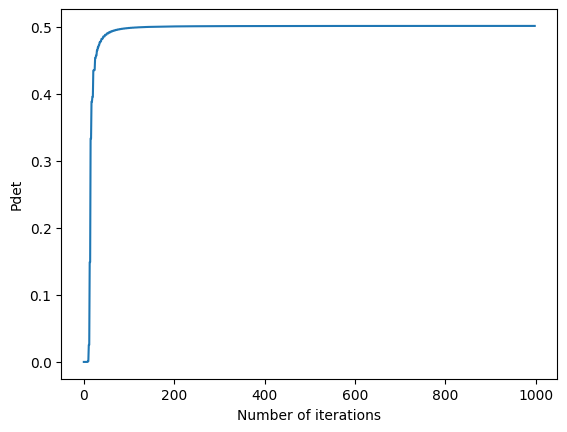

In [9]:
Pdet_list = []
Pdet_list.append(F_list[0])
print(Pdet_list)
ok = F_list[0]
Pdet = ok
for i in range(2,total_itr):
    Pdet += F_list[i-1]
    Pdet_list.append(Pdet)
plt.plot(Pdet_list)
plt.xlabel('Number of iterations')
plt.ylabel('Pdet')
print(F_list)

In [11]:
print(F_list)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0009765624999999985, 0.0, 0.02441406249999996, 0.0, 0.12359619140624974, 0.0, 0.18463134765624953, 0.0, 0.05493164062499984, 0.0, 0.007385253906249974, 0.0, 0.03910660743713366, 0.0, 0.0007212162017822244, 0.0, 0.017866864800453113, 0.0, 0.0036511570215225033, 0.0, 0.007719398476183382, 0.0, 0.0045281136408448, 0.0, 0.003344402648508531, 0.0, 0.004225317388772941, 0.0, 0.0014581033610738718, 0.0, 0.0035768561647273336, 0.0, 0.0006312430059551828, 0.0, 0.002918255654549269, 0.0, 0.00026481899482177725, 0.0, 0.0023518165349400793, 0.0, 0.00010333158661523957, 0.0, 0.0018931373816144345, 0.0, 3.462127086267771e-05, 0.0, 0.001530238859694096, 0.0, 8.0931480587499e-06, 0.0, 0.0012451491185539103, 0.0, 4.441459961584973e-07, 0.0, 0.0010210352760770254, 0.0, 8.19532724154113e-07, 0.0, 0.000844048603588, 0.0, 4.173627162635707e-06, 0.0, 0.0007033646431647086, 0.0, 8.213822931931323e-06, 0.0, 0.0005907031694223191, 0.0, 1.1960211533995716e-05, 0.0

In [12]:
print(Pdet_list)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0009765624999999985, 0.0009765624999999985, 0.02539062499999996, 0.02539062499999996, 0.1489868164062497, 0.1489868164062497, 0.3336181640624992, 0.3336181640624992, 0.38854980468749906, 0.38854980468749906, 0.39593505859374906, 0.39593505859374906, 0.43504166603088273, 0.43504166603088273, 0.43576288223266496, 0.43576288223266496, 0.4536297470331181, 0.4536297470331181, 0.4572809040546406, 0.4572809040546406, 0.465000302530824, 0.465000302530824, 0.4695284161716688, 0.4695284161716688, 0.47287281882017734, 0.47287281882017734, 0.4770981362089503, 0.4770981362089503, 0.4785562395700242, 0.4785562395700242, 0.48213309573475155, 0.48213309573475155, 0.48276433874070673, 0.48276433874070673, 0.485682594395256, 0.485682594395256, 0.4859474133900778, 0.4859474133900778, 0.4882992299250179, 0.4882992299250179, 0.48840256151163314, 0.48840256151163314, 0.4902956988932476, 0.4902956988932476, 0.49033032016411027, 0.49033032016411027, 0.4918605590

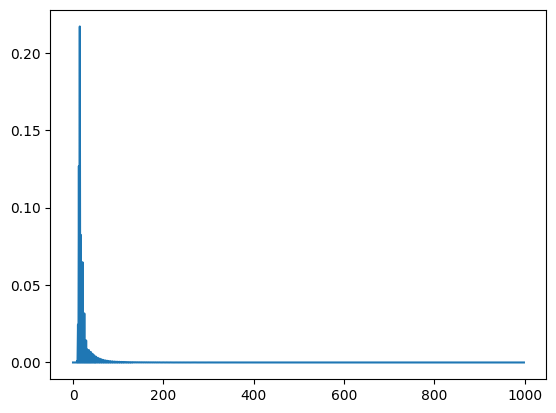

In [13]:
plt.plot(P_list)

[0.0]


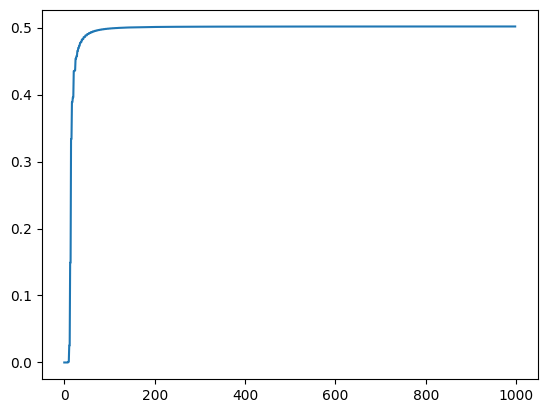

In [14]:
PdetList = []
PdetList.append(F_list[0])
print(PdetList)
Pdet = F_list[0]
for i in range(2,total_itr):
    Pdet += F_list[i-1]
    PdetList.append(Pdet)
plt.plot(PdetList)

In [ ]:
# def p_and_f_totaIterations_param(total_itr):
#     # Fn calculation 
#     P_list = []
#     F_list = []
#     p1 = np.abs(target_ket.T @ ( U @ inital_state))**2
#     p1 = p1.item()
#     # print(p1)
#     P_list.append(p1)
#     evolved_ket = inital_state
#     F_list.append(p1)
#     # print(F_list)
#     for i in range(2,total_itr):
#         # evolved ket [ ( I − Dˆ ) Uˆ ( τ ) ] n − 1 | init ⟩
#         evolved_ket = detection_op @ evolved_ket
#         num = np.abs(target_ket.T @ (U @ evolved_ket))**2
#         num = num.item()
#         denom = 1
#         for j in range(1,i):
#             # print(i)
#             # print(j)
#             denom *= (1-P_list[j-1])
#         Pn = num / denom
#         P_list.append(Pn)
#         Fn = 1 
#         for j in range(1,i):
#             Fn *= (1-P_list[j-1])
#         Fn*=P_list[i-1]
#         F_list.append(Fn)
#     return F_list



In [ ]:
def p_and_f_totaIterations_param(total_itr):
    # Fn calculation 
    P_list = []
    F_list = []
    p1 = np.abs(target_ket.T @ ( U @ inital_state))**2
    p1 = p1.item()
    # print(p1)
    P_list.append(p1)
    evolved_ket = inital_state
    F_list.append(p1)
    # print(F_list)
    for i in range(2,total_itr):
        # evolved ket [ ( I − Dˆ ) Uˆ ( τ ) ] n − 1 | init ⟩
        evolved_ket = detection_op @ evolved_ket
        num = np.abs(target_ket.T @ (U @ evolved_ket))**2
        num = num.item()
        denom = 1
        for j in range(1,i):
            # print(i)
            # print(j)
            denom *= (1-P_list[j-1])
        Pn = num / denom
        P_list.append(Pn)
        Fn = 1 
        for j in range(1,i):
            Fn *= (1-P_list[j-1])
        Fn*=P_list[i-1]
        F_list.append(Fn)
    return F_list


def fntilda_param(total_itr):
    # Fn calculation 
    P_list = []
    F_list = []
    p1 = np.abs(target_ket.T @ ( U @ inital_state))**2
    p1 = p1.item()
    # print(p1)
    P_list.append(p1)
    evolved_ket = inital_state
    F_list.append(p1)
    # print(F_list)
    for i in range(2,total_itr):
        # evolved ket [ ( I − Dˆ ) Uˆ ( τ ) ] n − 1 | init ⟩
        evolved_ket = detection_op @ evolved_ket
        num = np.abs(target_ket.T @ (U @ evolved_ket))**2
        num = num.item()
        denom = 1
        for j in range(1,i):
            # print(i)
            # print(j)
            denom *= (1-P_list[j-1])
        Pn = num / denom
        P_list.append(Pn)
        Fn = 1 
        for j in range(1,i):
            Fn *= (1-P_list[j-1])
        Fn*=P_list[i-1]
        F_list.append(Fn)
    # print(total_itr)
    return F_list[total_itr-2]



# Calculating with Resetting 
- n = r * R + n' , r : resetting rate 
- fn(r) = [ 1 - Pdet(r)]^R Fn' 
- Pdet(r) = sum ( Fi ) i = 1 to r 
- Prdet(n) = sum ( fi(r)) ( i = 1 to n)

In [17]:
print(fntilda_param(3))

0.0


## Calculate the pdet(r) sum(Fi) i=1 to r
- Fi fds from i to r 

In [ ]:
def Pdet(r):
    Pdet_r = 0
    for i in range(1,r):
        Pdet_r += fntilda_param(i)
    return Pdet_r

def Fn_r(n,r):
    R = n//r
    n_tilda = n - R*r
    coef1 = (1 - Pdet(r))**R
    if(n_tilda == 0):
        return 0
    coef2 = fntilda_param(n_tilda)
    return coef1*coef2
r = 20 
# calculate Prdet(n) 
Prdet_list = []
Prdet_n = 0
for i in range(1,total_itr):
    Prdet_n += Fn_r(i,r)
    Prdet_list.append(Prdet_n)
plt.plot(Prdet_list)
plt.plot(PdetList)
plt.xlabel('Iterations')
plt.ylabel('Prdet')
plt.title('Prdet vs Iterations')
plt.legend(['Prdet after resetting ','Pdet'])
plt.show()

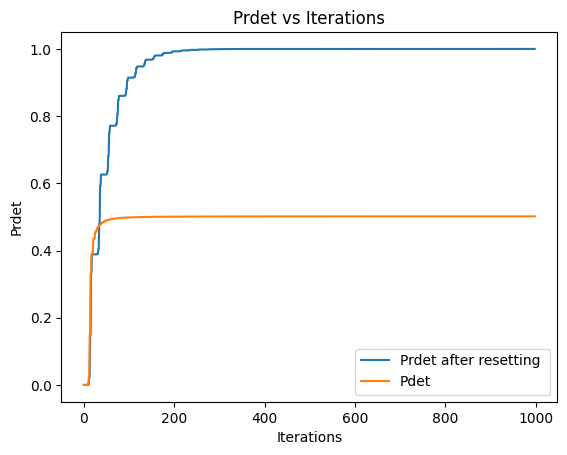

In [ ]:
# plt.plot(Prdet_list)
# plt.plot(PdetList)
# plt.xlabel('Iterations')
# plt.ylabel('Prdet')
# plt.title('Prdet vs Iterations')
# plt.legend(['Prdet after resetting ','Pdet'])
# plt.show()

# Tfr 


In [ ]:
def tfr(r):
    if(Pdet(r) == 0):
        return 0
    expr1 = (1-Pdet(r))*r/Pdet(r)
    expr2 = 1/Pdet(r)
    num2 = 0
    for i in range(1,r):
        num2+= i*fntilda_param(i)
    expr2 = num2*expr2
    return expr1 + expr2
tfr_list = []
step_list = [1,10,20,50,105,205,305,405,450]
for r in step_list:
    tfr_list.append(tfr(r))
tfr_list[0] = 500
tfr_list[1] = 500
plt.plot(step_list, tfr_list, marker='o')
plt.xlabel('Step List')
plt.ylabel('TFR List')
plt.title('TFR List vs Step List')
plt.xticks(np.arange(min(step_list), max(step_list)+1, 50))
plt.yticks(np.arange(min(tfr_list), 500, 50))
plt.show()

47.85359723531272


In [24]:
print("hi")

hi


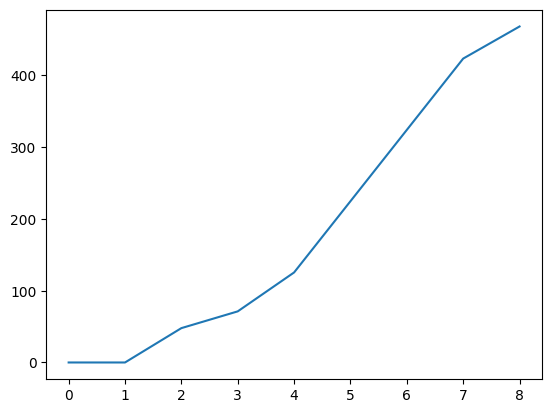

In [25]:
tfr_list = []
step_list = [1,10,20,50,105,205,305,405,450]
for r in step_list:
    tfr_list.append(tfr(r))
plt.plot(tfr_list)

In [36]:
tfr_list[0] = 500
tfr_list[1] = 500

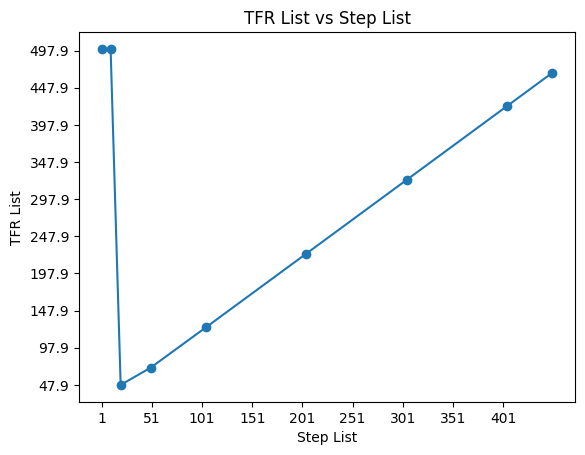

In [37]:
plt.plot(step_list, tfr_list, marker='o')
plt.xlabel('Step List')
plt.ylabel('TFR List')
plt.title('TFR List vs Step List')
plt.xticks(np.arange(min(step_list), max(step_list)+1, 50))
plt.yticks(np.arange(min(tfr_list), 500, 50))
plt.show()


# Project Report Format 
## 1D random walk 
- theta variation 
-  step variation 
- init conditions 
### Resetting 
## 2D Random Walk 
- all init conditions 
- theta variation 


KeyboardInterrupt: 

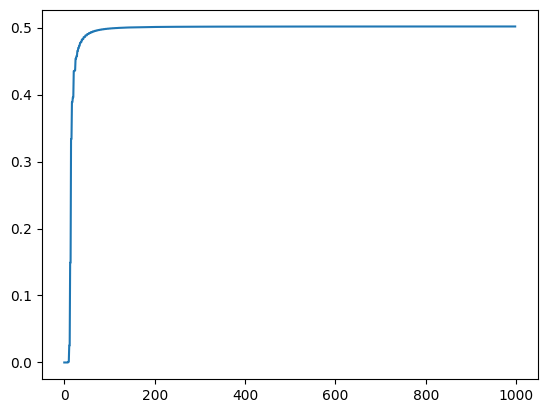

In [ ]:
# # import numpy as np

# # import matplotlib.pyplot as plt

# def quantum_walk(target_site):
#     # Number of steps and positions
#     n_steps = 40
#     n_positions = 1000

#     coin = np.array([[1/np.sqrt(2), 1/np.sqrt(2)],
#                      [1/np.sqrt(2), -1/np.sqrt(2)]])
#     # Define the vectors
#     up = np.array([1, 0])
#     down = np.array([0, 1])

#     # Reshape up to be a column vector
#     up_t = up.reshape(-1, 1)

#     # Perform the outer product
#     up_matrix = up_t @ up.reshape(1, -1)

#     down_t = down.reshape(-1,1)
#     down_matrix = down_t @ down.reshape(1,-1)

#     n = n_positions
#     S_right = np.zeros((n,n))
#     for i in range(0,n-1):
#         S_right[i+1][i] = 1
#     S_left = np.zeros((n,n))
#     for i in range(1,n):
#         S_left[i-1][i] =1 

#     S1 = np.kron(up_matrix,S_right)
#     S2 = np.kron(down_matrix,S_left)
#     S = S1 + S2

#     init_space = np.zeros(n_positions)
#     init_space[500] = 1  # starts from the center 
#     inital_state = np.kron(up,init_space) # up X init 
#     state = inital_state
#     total_itr = 1000
#     H_adjusted = np.kron(coin,np.eye(n,n))
#     U = S @ H_adjusted

#     # creating the projection operator 
#     init_space[500] = 0
#     init_space[target_site] = 1 
#     target_ket = np.kron(up,init_space) 
#     target_ket = target_ket.reshape(-1,1)
#     D = target_ket @ target_ket.T
#     detection_op = (np.eye(2*n,2*n) - D)@U

#     # Fn calculation 
#     P_list = []
#     F_list = []
#     p1 = np.abs(target_ket.T @ ( U @ inital_state))**2
#     p1 = p1.item()
#     P_list.append(p1)
#     evolved_ket = inital_state
#     F_list.append(p1)
#     for i in range(2,total_itr):
#         evolved_ket = detection_op @ evolved_ket
#         num = np.abs(target_ket.T @ (U @ evolved_ket))**2
#         num = num.item()
#         denom = 1
#         for j in range(1,i):
#             denom *= (1-P_list[j-1])
#         Pn = num / denom
#         P_list.append(Pn)
#         Fn = 1 
#         for j in range(1,i):
#             Fn *= (1-P_list[j-1])
#         Fn*=P_list[i-1]
#         F_list.append(Fn)

#     Pdet_list = []
#     Pdet_list.append(F_list[0])
#     ok = F_list[0]
#     Pdet = ok
#     for i in range(2,total_itr):
#         Pdet += F_list[i-1]
#         Pdet_list.append(Pdet)
#     plt.plot(Pdet_list)

#     def p_and_f_totaIterations_param(total_itr):
#         P_list = []
#         F_list = []
#         p1 = np.abs(target_ket.T @ ( U @ inital_state))**2
#         p1 = p1.item()
#         P_list.append(p1)
#         evolved_ket = inital_state
#         F_list.append(p1)
#         for i in range(2,total_itr):
#             evolved_ket = detection_op @ evolved_ket
#             num = np.abs(target_ket.T @ (U @ evolved_ket))**2
#             num = num.item()
#             denom = 1
#             for j in range(1,i):
#                 denom *= (1-P_list[j-1])
#             Pn = num / denom
#             P_list.append(Pn)
#             Fn = 1 
#             for j in range(1,i):
#                 Fn *= (1-P_list[j-1])
#             Fn*=P_list[i-1]
#             F_list.append(Fn)
#         return F_list

#     def fntilda_param(total_itr):
#         P_list = []
#         F_list = []
#         p1 = np.abs(target_ket.T @ ( U @ inital_state))**2
#         p1 = p1.item()
#         P_list.append(p1)
#         evolved_ket = inital_state
#         F_list.append(p1)
#         for i in range(2,total_itr):
#             evolved_ket = detection_op @ evolved_ket
#             num = np.abs(target_ket.T @ (U @ evolved_ket))**2
#             num = num.item()
#             denom = 1
#             for j in range(1,i):
#                 denom *= (1-P_list[j-1])
#             Pn = num / denom
#             P_list.append(Pn)
#             Fn = 1 
#             for j in range(1,i):
#                 Fn *= (1-P_list[j-1])
#             Fn*=P_list[i-1]
#             F_list.append(Fn)
#         return F_list[total_itr-2]

#     def Pdet(r):
#         Pdet_r = 0
#         for i in range(1,r):
#             Pdet_r += fntilda_param(i)
#         return Pdet_r

#     def Fn_r(n,r):
#         R = n//r
#         n_tilda = n - R*r
#         coef1 = (1 - Pdet(r))**R
#         if(n_tilda == 0):
#             return 0
#         coef2 = fntilda_param(n_tilda)
#         return coef1*coef2

#     r = 20 
#     Prdet_list = []
#     Prdet_n = 0
#     for i in range(1,total_itr):
#         Prdet_n += Fn_r(i,r)
#         Prdet_list.append(Prdet_n)

#     plt.plot(Prdet_list)
#     plt.plot(Pdet_list)
#     plt.xlabel('Iterations')
#     plt.ylabel('Prdet')
#     plt.title('Prdet vs Iterations')
#     plt.legend(['Prdet','Pdet'])
#     plt.show()

#     def tfr(r):
#         if(Pdet(r) == 0):
#             return 0
#         expr1 = (1-Pdet(r))*r/Pdet(r)
#         expr2 = 1/Pdet(r)
#         num2 = 0
#         for i in range(1,r):
#             num2+= i*fntilda_param(i)
#         expr2 = num2*expr2
#         return expr1 + expr2

#     tfr_list = []
#     step_list = [1,10,20,50,105,205,305,405,450]
#     for r in step_list:
#         tfr_list.append(tfr(r))
#     plt.plot(tfr_list)

#     tfr_list[0] = 500
#     tfr_list[1] = 500

#     plt.plot(step_list, tfr_list, marker='o')
#     plt.xlabel('Step List')
#     plt.ylabel('TFR List')
#     plt.title('TFR List vs Step List')
#     plt.xticks(np.arange(min(step_list), max(step_list)+1, 50))
#     plt.yticks(np.arange(min(tfr_list), 500, 50))
#     plt.show()

# # Example usage
# quantum_walk(target_site=510)